## Exercise Set 1 for OSM 

### Dynamic Programming with John Stachurski

This notebook contains the first set of exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

Consider the data

In [17]:
A = [[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]]

b = [[12],
     [10],
     [-1]]

A, b = map(np.asarray, (A, b))

The equation $x = A x + b$ has a unique solution in $\mathbb R^3$.  Show that this is true by checking the spectral radius condition.

In [3]:
from scipy.linalg import eigvals, solve
evs = eigvals(A)
ρ = max(abs(evs))
print(ρ)

0.965538166352


Compute the solution using both successive approximations --- that is,

$$ x_{t+1} = A x_t + b $$

and matrix algebra.

In [11]:
def approx(x_init, A, b, tol, max_iters=1000):
    repeat = True
    tolerance = tol
    x_old = x_init.copy()
    while repeat == True:
        iters = 1
        x_new = A @ x_old + b
        err = np.linalg.norm(x_new - x_old)
        if max_iters == iters:
            repeat = False
        if err <= tolerance:
            repeat = False
        else:
            del(x_old)
            x_old = x_new
            del(x_new)
            
        iters += 1
        
    return x_new     

In [22]:
start = np.array([1, 1, 1]).reshape(3,1)
convergence = 1e-3
x_star = approx(start, A, b, convergence)
x_star.round(3)

array([[ -0.897],
       [ 13.343],
       [ 45.645]])

In [26]:
I = np.eye(3)
A_prime = I - A
x_star_alg = solve(A_prime, b)
x_star_alg

array([[ -0.89552239],
       [ 13.34328358],
       [ 45.64179104]])

### Exercise 2

In a standard job search model, an agent 


* receives offer $w_t$ in period $t$ where $\{w_t\}$ is  iid
* accepts this offer at time $t$ or remains unemployed
    *  if remains unemployed, then receives compensation $c > 0$
    * if accepts, then works indefinitely at this wage

The agent discounts the future at rate $\beta \in (0, 1)$


It can be shown that the following is an optimal strategy: 

* Set a reservation wage $\bar w$
* Accept the first offer $w_t$ such that $w_t \geq \bar w$


It can also be shown (details omitted) that $\bar w$ should satisfy

$$
    \bar w
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, \bar w
    \right\}
    \, p_k
$$

Here 

* $w_1, \ldots, w_K$ are the possible wage values, occuring with probabilities $p_1, \ldots, p_K$
* $c > 0$

Does there always exists a $x \in [0, \infty)$ that solves the equation
$$
    x
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, x
    \right\}
    \, p_k
$$
Is it unique?  Suggest a strategy for computing it

#### Hints

There are different ways to show this, but I found the following facts useful:

*  If $x_1, \ldots, x_K$ are any $K$ numbers, then

$$ \left| \sum_{k=1}^K x_k \right| \leq \sum_{k=1}^K |x_k| $$

* For any $a, x, y$ in $\mathbb R$, 
    
$$ 
    \left| 
            \max \left\{ a,\, x \right\} - \max \left\{ a,\, y \right\} 
        \right|
        \leq | x - y |
$$


You can convince yourself of the second inequality by sketching and checking different cases...

#### Answer:
Need to show that this is actually a contracion mapping.

$$
\left| \, c(1- \beta) +\beta \sum_{k=1}^K 
\max \left\{ w_k,\, x \right\}\, p_k - c(1- \beta) - \beta \sum_{k=1}^K 
\max \left\{ w_k,\, y \right\}\, p_k \right| \\
= \left| \,  +\beta \sum_{k=1}^K 
\max \left\{ w_k,\, x \right\}\, p_k  - \beta \sum_{k=1}^K 
\max \left\{ w_k,\, y \right\}\, p_k \right| \\
=\left| \, \beta \left( \sum_{k=1}^K 
\max \left\{ w_k,\, x \right\} \, p_k -
\max \left\{ w_k,\, y \right\} \, p_k \right) \right| \\
\leq \beta \sum_{k=1}^K |\max \left\{ w_k,\, x \right\} \, p_k - \max \left\{ w_k,\, y \right\} \, p_k | \\
\leq \beta \sum_{k=1}^K \, p_k |x-y| 
= \beta  |x-y| \sum_{k=1}^K \, p_k = \beta  |x-y| 
$$

It is, because the condition $\rho(Tx, Ty) \leq \alpha \rho(x, y)$ is satisfied. So, just iterating over it like in the previous excersise.

### Exercise 3

Let 

* $\beta = 0.96$
* $(w_1, w_2, w_3) = (0.5, 1.0, 1.5)$
* $(p_1, p_2, p_3) = (0.2, 0.4, 0.4)$

Compute and plot the reservation wage for unemployment compensation values

In [58]:
def get_wbar(x_init, wvec, pvec, c_val, beta, tol, max_iters=1000):
    
    repeat = True
    x_old = x_init
    while repeat:
        iters = 1
        max_w = np.maximum(wvec, x_old)
        wp = max_w @ pvec.T
        x_new = c_val * (1 - beta) + beta * wp
        
        err = x_new - x_old
        dev = np.linalg.norm(err)
        if dev <= tol:
            repeat = False
        if iters == max_iters:
            print('maximum iterations reached')
            break
        
        del(x_old)
        x_old = x_new.copy()
        del(x_new)
        iters +=1
        
    return x_old
        

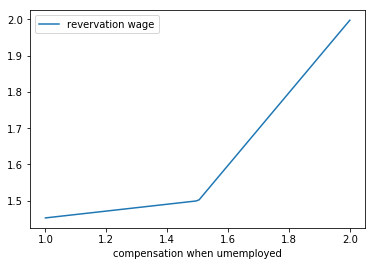

In [67]:
c_vals = np.linspace(1, 2, 100)
wvec = np.array([[0.5, 1.0, 1.5]])
pvec = np.array([[0.2, 0.4, 0.4]])
x_start = 1

w_bar = np.zeros(100)
for i in range(100):
    w_bar[i] = get_wbar(x_init=1, wvec=wvec, pvec=pvec, c_val=c_vals[i],
                        beta=0.96, tol=1e-4)

fig, ax = plt.subplots()
ax.plot(c_vals, w_bar, label='revervation wage')
ax.set_xlabel('compensation when umemployed')
plt.legend()
plt.show()

Is the reservation wage increasing or decreasing in this value?  Does that coincide with your intuition?

The reservation wage is, of course, an increasing function of the compensation $c$ that agents get when umemployed. A maximizing agent will only consider to work if the the net present value of working exceeds the opportunity cost which is given by $c$. In the case of equality of the two the agent is indifferent.